In [65]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
df = pd.read_csv('/content/drive/MyDrive/iot imbalanced data 34-1', sep='\t')

df.head(5)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.545404e+09,CrDn63WjJEmrWGjqf,192.168.1.195,41040,185.244.25.235,80,tcp,-,3.139211,0,0,S0,-,-,0,S,3,180,0,0,-,Benign,-
1,1.545404e+09,CY9lJW3gh1Eje4usP6,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,-,Benign,-
2,1.545404e+09,CcFXLynukEDnUlvgl,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,-,Benign,-
3,1.545404e+09,CDrkrSobGYxHhYfth,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149,128252,SF,-,-,2896,ShADadttcfF,94,5525,96,139044,-,Benign,-
4,1.545404e+09,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042,185.244.25.235,80,tcp,-,3.147116,0,0,S0,-,-,0,S,3,180,0,0,-,Benign,-


In [4]:
df.shape

(23145, 23)

In [5]:
df.tunnel_parents.unique()

array(['-'], dtype=object)

In [6]:
df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label'],
      dtype='object')

In [7]:
df.label.unique()

array(['Benign', 'Malicious'], dtype=object)

In [67]:
df['detailed-label'].unique()

array(['-', 'C&C', 'PartOfAHorizontalPortScan', 'DDoS'], dtype=object)

In [68]:
df = pd.read_csv('/content/drive/MyDrive/iot imbalanced data 1-1', sep='\t')

df.head(5)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.545404e+09,CrDn63WjJEmrWGjqf,192.168.1.195,41040,185.244.25.235,80,tcp,-,3.139211,0,0,S0,-,-,0,S,3,180,0,0,-,Benign,-
1,1.545404e+09,CY9lJW3gh1Eje4usP6,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,-,Benign,-
2,1.545404e+09,CcFXLynukEDnUlvgl,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,-,Benign,-
3,1.545404e+09,CDrkrSobGYxHhYfth,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149,128252,SF,-,-,2896,ShADadttcfF,94,5525,96,139044,-,Benign,-
4,1.545404e+09,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042,185.244.25.235,80,tcp,-,3.147116,0,0,S0,-,-,0,S,3,180,0,0,-,Benign,-


In [69]:
df['detailed-label'].unique()

array(['-', 'C&C', 'PartOfAHorizontalPortScan', 'DDoS'], dtype=object)

In [71]:
df.label.unique()

array(['Benign', 'Malicious'], dtype=object)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23145 entries, 0 to 23144
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ts              23145 non-null  float64
 1   uid             23145 non-null  object 
 2   id.orig_h       23145 non-null  object 
 3   id.orig_p       23145 non-null  int64  
 4   id.resp_h       23145 non-null  object 
 5   id.resp_p       23145 non-null  int64  
 6   proto           23145 non-null  object 
 7   service         23145 non-null  object 
 8   duration        23145 non-null  object 
 9   orig_bytes      23145 non-null  object 
 10  resp_bytes      23145 non-null  object 
 11  conn_state      23145 non-null  object 
 12  local_orig      23145 non-null  object 
 13  local_resp      23145 non-null  object 
 14  missed_bytes    23145 non-null  int64  
 15  history         23145 non-null  object 
 16  orig_pkts       23145 non-null  int64  
 17  orig_ip_bytes   23145 non-null 

In [73]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(missing_values='-',strategy='most_frequent')
imputer=imputer.fit(df.iloc[:,[-1]])
df.iloc[:,[-1]]=imputer.transform(df.iloc[:,[-1]])

In [74]:
df.loc[:,:]

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.545404e+09,CrDn63WjJEmrWGjqf,192.168.1.195,41040,185.244.25.235,80,tcp,-,3.139211,0,0,S0,-,-,0,S,3,180,0,0,-,Benign,DDoS
1,1.545404e+09,CY9lJW3gh1Eje4usP6,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,-,Benign,DDoS
2,1.545404e+09,CcFXLynukEDnUlvgl,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,-,Benign,DDoS
3,1.545404e+09,CDrkrSobGYxHhYfth,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149,128252,SF,-,-,2896,ShADadttcfF,94,5525,96,139044,-,Benign,DDoS
4,1.545404e+09,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042,185.244.25.235,80,tcp,-,3.147116,0,0,S0,-,-,0,S,3,180,0,0,-,Benign,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23140,1.545490e+09,C2F17zSUnGOcWzBa7,192.168.1.195,57110,185.244.25.235,6667,tcp,irc,32.840994,62,269,S3,-,-,0,ShAdDaf,7,434,6,589,-,Malicious,C&C
23141,1.545490e+09,C93P4z4k5IRJD1rXJg,192.168.1.195,57092,185.244.25.235,6667,tcp,irc,36.290833,62,260,S3,-,-,0,ShAdDaf,10,606,7,632,-,Malicious,C&C
23142,1.545490e+09,CXLZ3A2QY5E8weqpDk,192.168.1.195,123,147.251.48.140,123,udp,-,-,-,-,S0,-,-,0,D,1,76,0,0,-,Benign,DDoS
23143,1.545490e+09,CuXpFN3fWesWBXUhq1,192.168.1.195,123,82.113.53.40,123,udp,-,-,-,-,S0,-,-,0,D,1,76,0,0,-,Benign,DDoS


In [75]:
df['tunnel_parents'].unique()

array(['-'], dtype=object)

In [76]:
df.drop('tunnel_parents', axis=1, inplace=True)

In [77]:
df.head(5)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed-label
0,1.545404e+09,CrDn63WjJEmrWGjqf,192.168.1.195,41040,185.244.25.235,80,tcp,-,3.139211,0,0,S0,-,-,0,S,3,180,0,0,Benign,DDoS
1,1.545404e+09,CY9lJW3gh1Eje4usP6,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,Benign,DDoS
2,1.545404e+09,CcFXLynukEDnUlvgl,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,-,-,0,S,1,60,0,0,Benign,DDoS
3,1.545404e+09,CDrkrSobGYxHhYfth,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149,128252,SF,-,-,2896,ShADadttcfF,94,5525,96,139044,Benign,DDoS
4,1.545404e+09,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042,185.244.25.235,80,tcp,-,3.147116,0,0,S0,-,-,0,S,3,180,0,0,Benign,DDoS


In [78]:
df['local_resp'].unique()

array(['-'], dtype=object)

In [79]:
df.drop('local_resp', axis=1, inplace=True)

In [80]:
df.head(5)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed-label
0,1.545404e+09,CrDn63WjJEmrWGjqf,192.168.1.195,41040,185.244.25.235,80,tcp,-,3.139211,0,0,S0,-,0,S,3,180,0,0,Benign,DDoS
1,1.545404e+09,CY9lJW3gh1Eje4usP6,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,-,0,S,1,60,0,0,Benign,DDoS
2,1.545404e+09,CcFXLynukEDnUlvgl,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,-,0,S,1,60,0,0,Benign,DDoS
3,1.545404e+09,CDrkrSobGYxHhYfth,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149,128252,SF,-,2896,ShADadttcfF,94,5525,96,139044,Benign,DDoS
4,1.545404e+09,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042,185.244.25.235,80,tcp,-,3.147116,0,0,S0,-,0,S,3,180,0,0,Benign,DDoS


In [81]:
df['local_orig'].unique()

array(['-'], dtype=object)

In [82]:
df.drop('local_orig', axis=1, inplace=True)

In [83]:
df.head(5)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed-label
0,1.545404e+09,CrDn63WjJEmrWGjqf,192.168.1.195,41040,185.244.25.235,80,tcp,-,3.139211,0,0,S0,0,S,3,180,0,0,Benign,DDoS
1,1.545404e+09,CY9lJW3gh1Eje4usP6,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,0,S,1,60,0,0,Benign,DDoS
2,1.545404e+09,CcFXLynukEDnUlvgl,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,-,S0,0,S,1,60,0,0,Benign,DDoS
3,1.545404e+09,CDrkrSobGYxHhYfth,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149,128252,SF,2896,ShADadttcfF,94,5525,96,139044,Benign,DDoS
4,1.545404e+09,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042,185.244.25.235,80,tcp,-,3.147116,0,0,S0,0,S,3,180,0,0,Benign,DDoS


In [84]:
df['resp_bytes'].unique()

array(['0', '-', '128252', '128348', '91961', '99303', '48', '164266',
       '17192', '124067', '84592', '243', '100178', '83792', '242',
       '103381', '110211', '234', '112443', '124', '288', '241', '197',
       '103', '206', '94', '39', '384', '192', '240', '300', '144',
       '18031', '260', '269', '17210', '151', '195', '4324', '198',
       '4016', '133', '10996', '7313'], dtype=object)

In [85]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(missing_values='-',strategy='most_frequent')
imputer=imputer.fit(df.iloc[:,[-10]])
df.iloc[:,[-10]]=imputer.transform(df.iloc[:,[-10]])

In [86]:
df['resp_bytes'].unique()

array(['0', '128252', '128348', '91961', '99303', '48', '164266', '17192',
       '124067', '84592', '243', '100178', '83792', '242', '103381',
       '110211', '234', '112443', '124', '288', '241', '197', '103',
       '206', '94', '39', '384', '192', '240', '300', '144', '18031',
       '260', '269', '17210', '151', '195', '4324', '198', '4016', '133',
       '10996', '7313'], dtype=object)

In [87]:
df.head(5)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed-label
0,1.545404e+09,CrDn63WjJEmrWGjqf,192.168.1.195,41040,185.244.25.235,80,tcp,-,3.139211,0,0,S0,0,S,3,180,0,0,Benign,DDoS
1,1.545404e+09,CY9lJW3gh1Eje4usP6,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,0,S0,0,S,1,60,0,0,Benign,DDoS
2,1.545404e+09,CcFXLynukEDnUlvgl,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,0,S0,0,S,1,60,0,0,Benign,DDoS
3,1.545404e+09,CDrkrSobGYxHhYfth,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149,128252,SF,2896,ShADadttcfF,94,5525,96,139044,Benign,DDoS
4,1.545404e+09,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042,185.244.25.235,80,tcp,-,3.147116,0,0,S0,0,S,3,180,0,0,Benign,DDoS


In [88]:
df['orig_bytes'].unique()

array(['0', '-', '149', '151', '148', '48', '952', '75', '152', '74',
       '150', '60', '288', '73', '156', '78', '39', '96', '384', '345',
       '13115', '2945024', '62', '2572', '595', '470', '75546624', '3643',
       '3445'], dtype=object)

In [89]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(missing_values='-',strategy='most_frequent')
imputer=imputer.fit(df.iloc[:,[-11]])
df.iloc[:,[-11]]=imputer.transform(df.iloc[:,[-11]])

In [90]:
df['orig_bytes'].unique()

array(['0', '149', '151', '148', '48', '952', '75', '152', '74', '150',
       '60', '288', '73', '156', '78', '39', '96', '384', '345', '13115',
       '2945024', '62', '2572', '595', '470', '75546624', '3643', '3445'],
      dtype=object)

In [31]:
df['duration'].unique()

array(['3.139211', '-', '1.477656', ..., '33.498912', '32.840994',
       '36.290833'], dtype=object)

In [32]:
df['service'].unique()

array(['-', 'http', 'irc', 'dns', 'dhcp'], dtype=object)

In [33]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(missing_values='-',strategy='most_frequent')
imputer=imputer.fit(df.iloc[:,[-12, -13]])
df.iloc[:,[-12, -13]]=imputer.transform(df.iloc[:,[-12, -13]])

In [91]:
df['service'].unique()

array(['-', 'http', 'irc', 'dns', 'dhcp'], dtype=object)

In [92]:
df['duration'].unique()

array(['3.139211', '-', '1.477656', ..., '33.498912', '32.840994',
       '36.290833'], dtype=object)

In [93]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed-label
0,1.545404e+09,CrDn63WjJEmrWGjqf,192.168.1.195,41040,185.244.25.235,80,tcp,-,3.139211,0,0,S0,0,S,3,180,0,0,Benign,DDoS
1,1.545404e+09,CY9lJW3gh1Eje4usP6,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,0,0,S0,0,S,1,60,0,0,Benign,DDoS
2,1.545404e+09,CcFXLynukEDnUlvgl,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,0,0,S0,0,S,1,60,0,0,Benign,DDoS
3,1.545404e+09,CDrkrSobGYxHhYfth,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149,128252,SF,2896,ShADadttcfF,94,5525,96,139044,Benign,DDoS
4,1.545404e+09,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042,185.244.25.235,80,tcp,-,3.147116,0,0,S0,0,S,3,180,0,0,Benign,DDoS


In [37]:
df.shape

(23145, 20)

In [38]:
df['detailed-label'].value_counts()

DDoS                         16317
C&C                           6706
PartOfAHorizontalPortScan      122
Name: detailed-label, dtype: int64

In [39]:
df['label'].value_counts()

Malicious    21222
Benign        1923
Name: label, dtype: int64

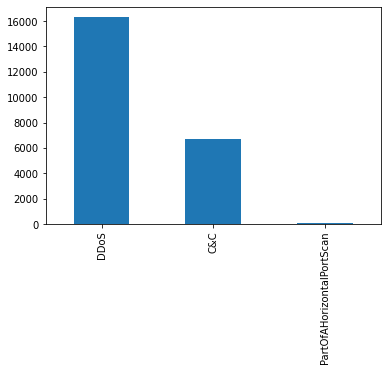

In [94]:
df['detailed-label'].value_counts().plot(kind="bar")

In [96]:
df.isnull().sum()

ts                0
uid               0
id.orig_h         0
id.orig_p         0
id.resp_h         0
id.resp_p         0
proto             0
service           0
duration          0
orig_bytes        0
resp_bytes        0
conn_state        0
missed_bytes      0
history           0
orig_pkts         0
orig_ip_bytes     0
resp_pkts         0
resp_ip_bytes     0
label             0
detailed-label    0
dtype: int64

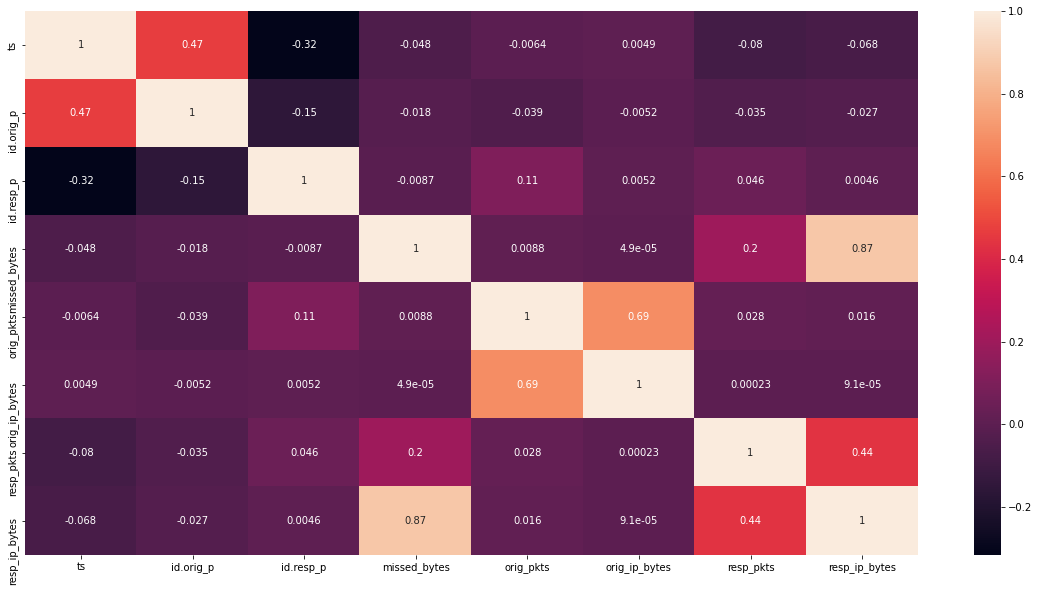

In [95]:
  plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),  annot=True)

In [42]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed-label
0,1.545404e+09,CrDn63WjJEmrWGjqf,192.168.1.195,41040,185.244.25.235,80,tcp,irc,3.139211,0,0,S0,0,S,3,180,0,0,Benign,DDoS
1,1.545404e+09,CY9lJW3gh1Eje4usP6,192.168.1.195,41040,185.244.25.235,80,tcp,irc,0.001496,0,0,S0,0,S,1,60,0,0,Benign,DDoS
2,1.545404e+09,CcFXLynukEDnUlvgl,192.168.1.195,41040,185.244.25.235,80,tcp,irc,0.001496,0,0,S0,0,S,1,60,0,0,Benign,DDoS
3,1.545404e+09,CDrkrSobGYxHhYfth,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149,128252,SF,2896,ShADadttcfF,94,5525,96,139044,Benign,DDoS
4,1.545404e+09,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042,185.244.25.235,80,tcp,irc,3.147116,0,0,S0,0,S,3,180,0,0,Benign,DDoS


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23145 entries, 0 to 23144
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ts              23145 non-null  float64
 1   uid             23145 non-null  object 
 2   id.orig_h       23145 non-null  object 
 3   id.orig_p       23145 non-null  int64  
 4   id.resp_h       23145 non-null  object 
 5   id.resp_p       23145 non-null  int64  
 6   proto           23145 non-null  object 
 7   service         23145 non-null  object 
 8   duration        23145 non-null  object 
 9   orig_bytes      23145 non-null  object 
 10  resp_bytes      23145 non-null  object 
 11  conn_state      23145 non-null  object 
 12  missed_bytes    23145 non-null  int64  
 13  history         23145 non-null  object 
 14  orig_pkts       23145 non-null  int64  
 15  orig_ip_bytes   23145 non-null  int64  
 16  resp_pkts       23145 non-null  int64  
 17  resp_ip_bytes   23145 non-null 

In [98]:
data=df
for column in data.columns:
    if data[column].dtype == np.int64:
        maxVal = data[column].max()
        if maxVal < 120:
            data[column] = data[column].astype(np.int8)
        elif maxVal < 32767:
            data[column] = data[column].astype(np.int16)
        else:
            data[column] = data[column].astype(np.int32)
            
    if data[column].dtype == np.float64:
        maxVal = data[column].max()
        minVal = data[data[column]>0][column].min()
        if maxVal < 120 and minVal>0.01 :
            data[column] = data[column].astype(np.float16)
        else:
            data[column] = data[column].astype(np.float32)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23145 entries, 0 to 23144
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ts              23145 non-null  float32
 1   uid             23145 non-null  object 
 2   id.orig_h       23145 non-null  object 
 3   id.orig_p       23145 non-null  int32  
 4   id.resp_h       23145 non-null  object 
 5   id.resp_p       23145 non-null  int32  
 6   proto           23145 non-null  object 
 7   service         23145 non-null  object 
 8   duration        23145 non-null  object 
 9   orig_bytes      23145 non-null  object 
 10  resp_bytes      23145 non-null  object 
 11  conn_state      23145 non-null  object 
 12  missed_bytes    23145 non-null  int16  
 13  history         23145 non-null  object 
 14  orig_pkts       23145 non-null  int16  
 15  orig_ip_bytes   23145 non-null  int32  
 16  resp_pkts       23145 non-null  int16  
 17  resp_ip_bytes   23145 non-null 

In [100]:
data.drop(['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p'], axis=1, inplace=True)

In [101]:
data.head(
    
)

,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed-label
0,tcp,-,3.139211,0,0,S0,0,S,3,180,0,0,Benign,DDoS
1,tcp,-,-,0,0,S0,0,S,1,60,0,0,Benign,DDoS
2,tcp,-,-,0,0,S0,0,S,1,60,0,0,Benign,DDoS
3,tcp,http,1.477656,149,128252,SF,2896,ShADadttcfF,94,5525,96,139044,Benign,DDoS
4,tcp,-,3.147116,0,0,S0,0,S,3,180,0,0,Benign,DDoS


In [48]:
data.shape

(23145, 14)

In [102]:
data.drop(['label'], axis=1, inplace=True), 

(None,)

In [103]:
data.head()

,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,detailed-label
0,tcp,-,3.139211,0,0,S0,0,S,3,180,0,0,DDoS
1,tcp,-,-,0,0,S0,0,S,1,60,0,0,DDoS
2,tcp,-,-,0,0,S0,0,S,1,60,0,0,DDoS
3,tcp,http,1.477656,149,128252,SF,2896,ShADadttcfF,94,5525,96,139044,DDoS
4,tcp,-,3.147116,0,0,S0,0,S,3,180,0,0,DDoS


In [104]:
for i in data :
  print(i, " : ", data[i].unique())

proto  :  ['tcp' 'udp']
service  :  ['-' 'http' 'irc' 'dns' 'dhcp']
duration  :  ['3.139211' '-' '1.477656' ... '33.498912' '32.840994' '36.290833']
orig_bytes  :  ['0' '149' '151' '148' '48' '952' '75' '152' '74' '150' '60' '288' '73'
 '156' '78' '39' '96' '384' '345' '13115' '2945024' '62' '2572' '595'
 '470' '75546624' '3643' '3445']
resp_bytes  :  ['0' '128252' '128348' '91961' '99303' '48' '164266' '17192' '124067'
 '84592' '243' '100178' '83792' '242' '103381' '110211' '234' '112443'
 '124' '288' '241' '197' '103' '206' '94' '39' '384' '192' '240' '300'
 '144' '18031' '260' '269' '17210' '151' '195' '4324' '198' '4016' '133'
 '10996' '7313']
conn_state  :  ['S0' 'SF' 'S3' 'RSTR' 'S1' 'OTH']
missed_bytes  :  [   0 2896 5792]
history  :  ['S' 'ShADadttcfF' 'ShADadtcfF' 'Dd' 'D' 'ShADadtctfF' 'DdAtaFf' 'ShAdDaf'
 'ShADacdtfF' 'ShADadtctfFR' 'ShAdDaft' 'ShADadttfF' 'ShAdfDr' 'ShAfdtDr'
 'ShAdDatf' 'ShAdDatfr' 'ShDadAf' 'ShAdD' 'ShADadf' 'ShAdDfr' 'ShAD' 'C'
 'CCCC' 'CCC' 'ShADad' 'Sh

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23145 entries, 0 to 23144
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   proto           23145 non-null  object
 1   service         23145 non-null  object
 2   duration        23145 non-null  object
 3   orig_bytes      23145 non-null  object
 4   resp_bytes      23145 non-null  object
 5   conn_state      23145 non-null  object
 6   missed_bytes    23145 non-null  int16 
 7   history         23145 non-null  object
 8   orig_pkts       23145 non-null  int16 
 9   orig_ip_bytes   23145 non-null  int32 
 10  resp_pkts       23145 non-null  int16 
 11  resp_ip_bytes   23145 non-null  int32 
 12  detailed-label  23145 non-null  object
dtypes: int16(3), int32(2), object(8)
memory usage: 1.7+ MB


In [107]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(missing_values='-',strategy='most_frequent')
imputer=imputer.fit(df.loc[:,['duration']])
df.loc[:,['duration']]=imputer.transform(df.loc[:,['duration']])

In [108]:
data['duration'] = data['duration'].astype(np.float32)
data['orig_bytes'] = data['orig_bytes'].astype(np.int64)
data['resp_bytes'] = data['resp_bytes'].astype(np.int64)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23145 entries, 0 to 23144
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   proto          23145 non-null  object 
 1   service        23145 non-null  object 
 2   duration       23145 non-null  float32
 3   orig_bytes     23145 non-null  int64  
 4   resp_bytes     23145 non-null  int64  
 5   conn_state     23145 non-null  object 
 6   missed_bytes   23145 non-null  int16  
 7   history        23145 non-null  object 
 8   orig_pkts      23145 non-null  int16  
 9   orig_ip_bytes  23145 non-null  int32  
 10  resp_pkts      23145 non-null  int16  
 11  resp_ip_bytes  23145 non-null  int32  
dtypes: float32(1), int16(3), int32(2), int64(2), object(4)
memory usage: 1.5+ MB


In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [110]:
y = data['detailed-label']
X = data.drop('detailed-label', 1,inplace=True)

In [124]:
X=data

In [127]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(missing_values='-',strategy='most_frequent')
imputer=imputer.fit(X.loc[:,['service']])
X.loc[:,['service']]=imputer.transform(X.loc[:,['service']])

In [130]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
categorical_cols=['proto','service','conn_state','history']

df1 = pd.get_dummies(data, columns = categorical_cols,drop_first=True)

In [129]:
X.service.unique()

array(['irc', 'http', 'dns', 'dhcp'], dtype=object)

In [133]:
X.head(2)

,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,tcp,irc,3.139211,0,0,S0,0,S,3,180,0,0
1,tcp,irc,0.001496,0,0,S0,0,S,1,60,0,0


In [134]:
df1.head(2)

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_udp,service_dns,service_http,service_irc,conn_state_RSTR,conn_state_S0,conn_state_S1,conn_state_S3,conn_state_SF,history_CCC,history_CCCC,history_D,history_Dd,history_DdAtaFf,history_S,history_ShAD,history_ShADacdtfF,history_ShADad,history_ShADadf,history_ShADadtcfF,history_ShADadtctfF,history_ShADadtctfFR,history_ShADadttcfF,history_ShADadttfF,history_ShAdD,history_ShAdDa,history_ShAdDaf,history_ShAdDaft,history_ShAdDatf,history_ShAdDatfr,history_ShAdDfr,history_ShAdfDr,history_ShAfdtDr,history_ShDadAf
0,3.139211,0,0,0,3,180,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.001496,0,0,0,1,60,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [135]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23145 entries, 0 to 23144
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   duration              23145 non-null  float32
 1   orig_bytes            23145 non-null  int64  
 2   resp_bytes            23145 non-null  int64  
 3   missed_bytes          23145 non-null  int16  
 4   orig_pkts             23145 non-null  int16  
 5   orig_ip_bytes         23145 non-null  int32  
 6   resp_pkts             23145 non-null  int16  
 7   resp_ip_bytes         23145 non-null  int32  
 8   proto_udp             23145 non-null  uint8  
 9   service_dns           23145 non-null  uint8  
 10  service_http          23145 non-null  uint8  
 11  service_irc           23145 non-null  uint8  
 12  conn_state_RSTR       23145 non-null  uint8  
 13  conn_state_S0         23145 non-null  uint8  
 14  conn_state_S1         23145 non-null  uint8  
 15  conn_state_S3      

In [136]:
y

0        DDoS
1        DDoS
2        DDoS
3        DDoS
4        DDoS
         ... 
23140     C&C
23141     C&C
23142    DDoS
23143    DDoS
23144    DDoS
Name: detailed-label, Length: 23145, dtype: object

In [137]:
el=LabelEncoder()
dlf=pd.DataFrame(y)
dlf["detailed-label"]=el.fit_transform(dlf["detailed-label"])
dlf

,detailed-label
0,1
1,1
2,1
3,1
4,1
...,...
23140,0
23141,0
23142,1
23143,1


In [138]:
Y = dlf["detailed-label"]

In [139]:
Y.value_counts()

1    16317
0     6706
2      122
Name: detailed-label, dtype: int64

In [140]:
dlf['detailed-label'].value_counts()

1    16317
0     6706
2      122
Name: detailed-label, dtype: int64

In [141]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(df1, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [142]:
pd.Series(y_smt).value_counts()


0    16311
2    16307
1    16301
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


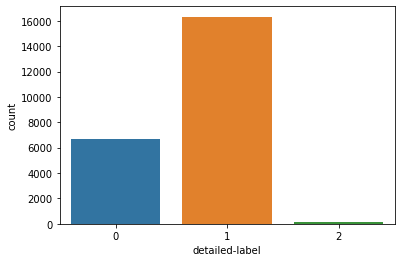

In [143]:
sns.countplot(dlf['detailed-label'])

In [144]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


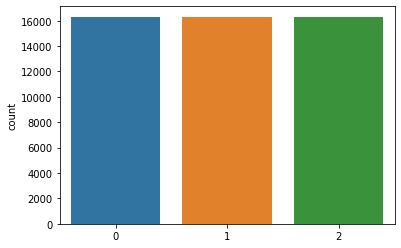

In [145]:
sns.countplot(pd.Series(y_smt))

In [146]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.62%


In [147]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.61%


In [148]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 97.27%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [149]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.61%


In [150]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [235]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [248]:
# Initialising the ANN
classifier = Sequential()

In [249]:
X_train.shape

(39135, 42)

In [250]:
classifier.add(Dense(units=50, activation='relu', input_dim=42))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.2))

In [251]:
# Adding the second hidden layer
classifier.add(Dense(units=40, activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [252]:
# Adding the output layer
classifier.add(Dense(units=3, activation='softmax'))


In [253]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [255]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
392/392 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8453
Epoch 2/150
392/392 [==============================] - 1s 2ms/step - loss: 0.3048 - accuracy: 0.8678
Epoch 3/150
392/392 [==============================] - 1s 2ms/step - loss: 0.3020 - accuracy: 0.8690
Epoch 4/150
392/392 [==============================] - 1s 2ms/step - loss: 0.3017 - accuracy: 0.8686
Epoch 5/150
392/392 [==============================] - 1s 2ms/step - loss: 0.2947 - accuracy: 0.8732
Epoch 6/150
392/392 [==============================] - 1s 2ms/step - loss: 0.2880 - accuracy: 0.8742
Epoch 7/150
392/392 [==============================] - 1s 2ms/step - loss: 0.2871 - accuracy: 0.8749
Epoch 8/150
392/392 [==============================] - 1s 2ms/step - loss: 0.2866 - accuracy: 0.8749
Epoch 9/150
392/392 [==============================] - 1s 2ms/step - loss: 0.2859 - accuracy: 0.8747
Epoch 10/150
392/392 [==============================] - 1s 2ms/step - loss: 0.2861 - accura

In [256]:
classifier.evaluate(X_test,y_test)

306/306 [==============================] - 0s 898us/step - loss: 0.2720 - accuracy: 0.8784


[0.2719813287258148, 0.878372848033905]

In [257]:
y_pred = classifier.predict(X_test)

In [273]:
np.array(y_predicted_labels)

array([0, 1, 2, ..., 0, 2, 1])

In [274]:
y_predicted_labels = np.array([i.argmax() for i in y_pred])

In [275]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted_labels)

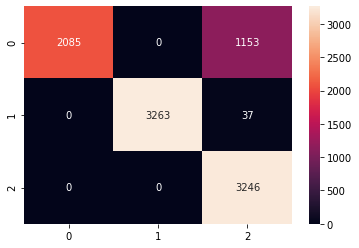

In [280]:
sns.heatmap(cm,annot=True,fmt='1g')